In [1]:
import pandas as pd 
import numpy as np 
import cv2

In [3]:
# Step 1: Import the OpenCV library
import cv2

# Step 2: Initialize the webcam
# cv2.VideoCapture(0) opens the default camera (usually the built-in webcam)
cap = cv2.VideoCapture(0)

# Step 3: Start an infinite loop to continuously capture frames from the webcam
while True:
    # Step 4: Read a frame from the webcam
    # ret is a boolean indicating if the frame was successfully captured
    # frame contains the image data
    ret, frame = cap.read()
    
    # Step 5: Check if the frame was successfully captured
    if not ret:
        break  # Exit the loop if no frame is captured

    # Step 6: Get the width and height of the frame
    # cap.get(3) returns the width of the frame
    # cap.get(4) returns the height of the frame
    width = int(cap.get(3))  # Convert width to an integer
    height = int(cap.get(4))  # Convert height to an integer

    # Step 7: Draw the first diagonal line (top-left to bottom-right)
    # cv2.line() draws a line on the frame
    # Arguments:
    #   - frame: The image on which to draw the line
    #   - (0, 0): Starting point of the line (top-left corner)
    #   - (width, height): Ending point of the line (bottom-right corner)
    #   - (255, 0, 0): Color of the line in BGR format (blue in this case)
    #   - 2: Thickness of the line
    img = cv2.line(frame, (0, 0), (width, height), (255, 0, 0), 2)

    # Step 8: Draw the second diagonal line (top-right to bottom-left)
    # cv2.line() draws another line on the frame
    # Arguments:
    #   - img: The image with the first line already drawn
    #   - (width, 0): Starting point of the line (top-right corner)
    #   - (0, height): Ending point of the line (bottom-left corner)
    #   - (0, 0, 255): Color of the line in BGR format (red in this case)
    #   - 2: Thickness of the line
    img = cv2.line(img, (width, 0), (0, height), (0, 0, 255), 2)

    # Step 9: Display the frame with the drawn lines
    # cv2.imshow() displays the image in a window
    # Arguments:
    #   - 'frame': Name of the window
    #   - img: The image to display
    cv2.imshow('frame', img)

    # Step 10: Check if the 'q' key is pressed to exit the loop
    # cv2.waitKey(1) waits for 1 millisecond for a key press
    # ord('q') returns the ASCII value of the 'q' key
    # If 'q' is pressed, break the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Step 11: Release the webcam
# cap.release() releases the webcam so it can be used by other applications
cap.release()

# Step 12: Close all OpenCV windows
# cv2.destroyAllWindows() closes all windows opened by OpenCV
cv2.destroyAllWindows()

In [4]:
import cv2

# Step 1: Read the image from a file
# Replace 'your_image.jpg' with the path to your image file
image = cv2.imread('x.png')

# Step 2: Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Step 3: Display the image in a window
    cv2.imshow('Image Window', image)

    # Step 4: Wait for a key press to close the window
    # cv2.waitKey(0) waits indefinitely for a key press
    cv2.waitKey(0)

    # Step 5: Close all OpenCV windows
    cv2.destroyAllWindows()

In [5]:
from matplotlib import pyplot as plt

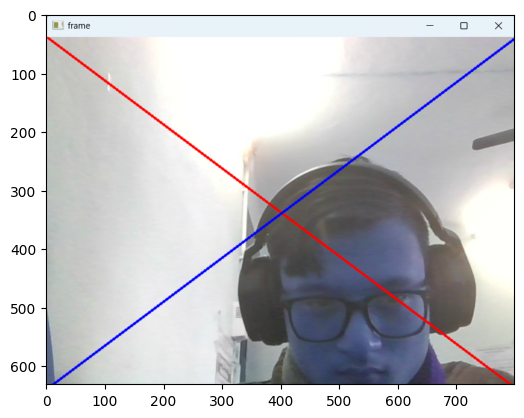

In [6]:
plt.imshow(image)

In [7]:
#now its more professional

In [13]:
import cv2
import numpy as np

class WebcamProcessor:
    def __init__(self):
        self.cap = cv2.VideoCapture(0)
        if not self.cap.isOpened():
            raise RuntimeError("Could not initialize video capture")
            
        self.show_circles = True
        self.show_dashed_lines = True
        self.animation_phase = 0
        self.line_colors = [(0, 255, 0), (255, 0, 0)]  # Green and blue

    def draw_animated_circles(self, frame):
        center = (frame.shape[1]//2, frame.shape[0]//2)
        max_radius = min(center) - 20
        
        # Create pulsing circles
        for i in range(3):
            radius = int(max_radius * (0.6 + 0.2 * np.sin(self.animation_phase + i*np.pi/3)))
            cv2.circle(frame, center, radius, (0, 255 - i*40, i*40), 2 + i)

    def draw_dashed_line(self, frame, start, end, color, thickness=1, dash_length=10):
        line_vec = np.array(end) - np.array(start)
        line_len = np.linalg.norm(line_vec)
        line_dir = line_vec / line_len

        for i in range(0, int(line_len), dash_length * 2):
            start_point = tuple(map(int, np.array(start) + line_dir * i))
            end_point = tuple(map(int, np.array(start) + line_dir * (i + dash_length)))
            cv2.line(frame, start_point, end_point, color, thickness)

    def draw_crosshair(self, frame):
        center_x, center_y = frame.shape[1]//2, frame.shape[0]//2
        size = 30
        
        # Crosshair arms
        cv2.line(frame, (center_x - size, center_y), (center_x + size, center_y), (0, 0, 255), 2)
        cv2.line(frame, (center_x, center_y - size), (center_x, center_y + size), (0, 0, 255), 2)

    def process_frame(self):
        ret, frame = self.cap.read()
        if not ret:
            return False

        # Draw dynamic elements
        if self.show_circles:
            self.draw_animated_circles(frame)
            
        if self.show_dashed_lines:
            self.draw_dashed_line(frame, (0, 0), (frame.shape[1], frame.shape[0]), self.line_colors[0], 2)
            self.draw_dashed_line(frame, (frame.shape[1], 0), (0, frame.shape[0]), self.line_colors[1], 2)

        self.draw_crosshair(frame)
        
        # Add HUD overlay
        self.add_hud_text(frame)
        
        # Display frame
        cv2.imshow('Advanced Webcam View', frame)
        self.animation_phase += 0.1
        
        return True

    def add_hud_text(self, frame):
        text_color = (255, 255, 255)
        cv2.putText(frame, "[C] Toggle Circles", (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2)
        cv2.putText(frame, "[D] Toggle Dashed Lines", (10, 60), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2)
        cv2.putText(frame, "[Q] Quit", (10, 90), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, text_color, 2)

    def run(self):
        try:
            while True:
                if not self.process_frame():
                    break
                
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q'):
                    break
                elif key == ord('c'):
                    self.show_circles = not self.show_circles
                elif key == ord('d'):
                    self.show_dashed_lines = not self.show_dashed_lines
        finally:
            self.cap.release()
            cv2.destroyAllWindows()

if __name__ == "__main__":
    processor = WebcamProcessor()
    processor.run()


In [ ]:
plt.imshow('X with circles'.p